In [29]:
import pystan
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

#Model definition
model = """
data {
    int<lower=0> N; // # data points 
    int<lower=0> K; // # regressors 
    matrix[N, K] x;  // data matrix
    vector[N] y; // predictions
}
parameters {
    real alpha;
    vector[K] beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(x*beta + alpha, sigma);
}
"""

In [37]:
#Load data
fileDir = '/Users/maxaragon/Desktop/stan_demo/mtcars.xls'
dF = pd.read_excel(fileDir)

#Format data
xData = np.array([dF[key] for key in dF if key=='hp' or key=='wt']).T
N,K = np.shape(xData)
yData = dF['mpg']
data = {'N': N, 'K': K, 'x': xData, 'y': yData}

#Compile model
sm = pystan.StanModel(model_code=model)

#Train model
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c30ea1f65b061ae733a9567fdc71b1c NOW.


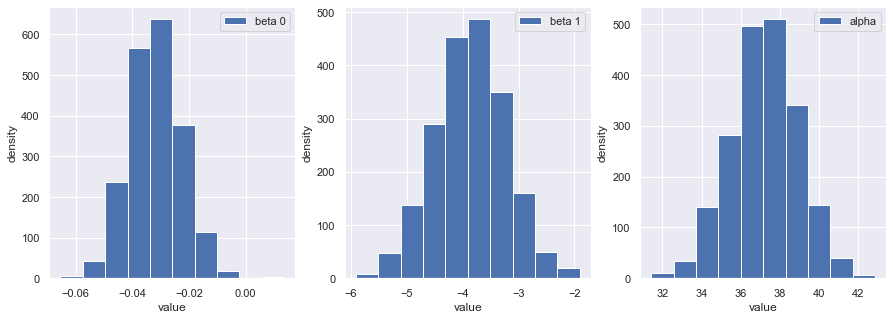

In [66]:
#Fitted parameters 
alpha = fit['alpha']
betas = fit['beta'].T

#Plot parameters
fig,ax = plt.subplots(1,3,figsize=(15,5))

for idx,beta in enumerate(betas):
    ax[idx].hist(beta,label = 'beta %d'%idx)
    ax[idx].legend()
    ax[idx].set_xlabel('value')
    ax[idx].set_ylabel('density')

ax[2].hist(alpha,label = 'alpha')
ax[2].set_xlabel('value')
ax[2].set_ylabel('density')
ax[2].legend()
plt.show()
